In [199]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
kmeans = KMeans()

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [220]:
full = pd.read_csv('train_set_nonscaled.csv')

In [221]:
full.head(5)

,parcelid,logerror,calculatedfinishedsquarefeet,lotsizesquarefeet,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,month,bedroomcnt,...,regionidzip,yearbuilt,fireplaceflag,taxdelinquencyflag,rawcensustractandblock,bathroomcnt,roomcnt,censustractandblock,sqftperrm,taxpersqft
0,11016594,0.0276,1684,7528.0,122754.0,360170.0,237416.0,6735.88,1,3,...,96370,1959,0,0,6.037107e+07,2.0,6.0,6.037107e+13,280.666667,213.877672
1,12098116,-0.0040,2217,11423.0,61994.0,119906.0,57912.0,11484.48,1,2,...,96293,1940,0,0,6.037464e+07,3.0,6.0,6.037464e+13,369.500000,54.084799
2,12643413,0.0218,839,70859.0,171518.0,244880.0,73362.0,3048.74,1,2,...,96222,1987,0,0,6.037296e+07,2.0,5.0,6.037296e+13,167.800000,291.871275
3,14432541,-0.0050,2283,6000.0,169574.0,434551.0,264977.0,5488.96,1,4,...,96961,1981,0,0,6.059042e+07,2.5,8.0,6.059042e+13,285.375000,190.342094
4,11509835,-0.2705,3067,2708.0,880650.0,2447951.0,1567301.0,27126.57,1,4,...,96109,1982,0,0,6.037621e+07,4.0,9.0,6.037621e+13,340.777778,798.158135


### Cross Validation

#### Train-test split.

In [223]:
full_set = full.drop('parcelid',axis =1)
full_set.head()


,logerror,calculatedfinishedsquarefeet,lotsizesquarefeet,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,month,bedroomcnt,hashottuborspa,...,regionidzip,yearbuilt,fireplaceflag,taxdelinquencyflag,rawcensustractandblock,bathroomcnt,roomcnt,censustractandblock,sqftperrm,taxpersqft
0,0.0276,1684,7528.0,122754.0,360170.0,237416.0,6735.88,1,3,0,...,96370,1959,0,0,6.037107e+07,2.0,6.0,6.037107e+13,280.666667,213.877672
1,-0.0040,2217,11423.0,61994.0,119906.0,57912.0,11484.48,1,2,0,...,96293,1940,0,0,6.037464e+07,3.0,6.0,6.037464e+13,369.500000,54.084799
2,0.0218,839,70859.0,171518.0,244880.0,73362.0,3048.74,1,2,0,...,96222,1987,0,0,6.037296e+07,2.0,5.0,6.037296e+13,167.800000,291.871275
3,-0.0050,2283,6000.0,169574.0,434551.0,264977.0,5488.96,1,4,0,...,96961,1981,0,0,6.059042e+07,2.5,8.0,6.059042e+13,285.375000,190.342094
4,-0.2705,3067,2708.0,880650.0,2447951.0,1567301.0,27126.57,1,4,0,...,96109,1982,0,0,6.037621e+07,4.0,9.0,6.037621e+13,340.777778,798.158135


In [224]:
X = full_set.drop('logerror',axis=1)
y = full_set['logerror']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=0)
                                                         
                                                                                                 

### Random Forest

In [226]:
X_train.shape
from math import sqrt
sqrt(22)

4.69041575982343

In [227]:
parameters = {'n_estimators':[120,300,500,800,1200],'n_jobs':[-1],'oob_score':[False],'max_features':["sqrt"]}

rf_reg = RandomForestRegressor(verbose=1)


In [228]:
rf_cv = GridSearchCV(rf_reg,
                    param_grid = parameters,
                    scoring = 'neg_mean_absolute_error',
                    cv=3)


In [229]:
rf_cv.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    8.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:    9.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | el

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=1, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [120, 300, 500, 800, 1200], 'n_jobs': [-1], 'oob_score': [False], 'max_features': ['sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

best cv parameters

In [230]:
print(rf_cv.best_params_)

{'max_features': 'sqrt', 'n_estimators': 1200, 'n_jobs': -1, 'oob_score': False}


In [232]:
def feature_importance(estimator,labels):
    feature_imp = pd.DataFrame.from_dict({'feature':labels,
                                         'importance':estimator.feature_importances_})
    feature_imp.set_index('feature',
                          inplace=False,
                          drop=True)
    feature_imp = feature_imp.sort_values('importance',ascending=False)
    return(feature_imp)
    
    

In [233]:
featureImportance = feature_importance(rf_cv.best_estimator_, X_train.columns)

In [234]:
featureImportance


,feature,importance
2,structuretaxvaluedollarcnt,0.071002
5,taxamount,0.069018
9,latitude,0.067988
23,taxpersqft,0.067604
22,sqftperrm,0.067081
3,taxvaluedollarcnt,0.066242
4,landtaxvaluedollarcnt,0.066013
1,lotsizesquarefeet,0.065959
0,calculatedfinishedsquarefeet,0.065840
10,longitude,0.064885


(-1, 24)

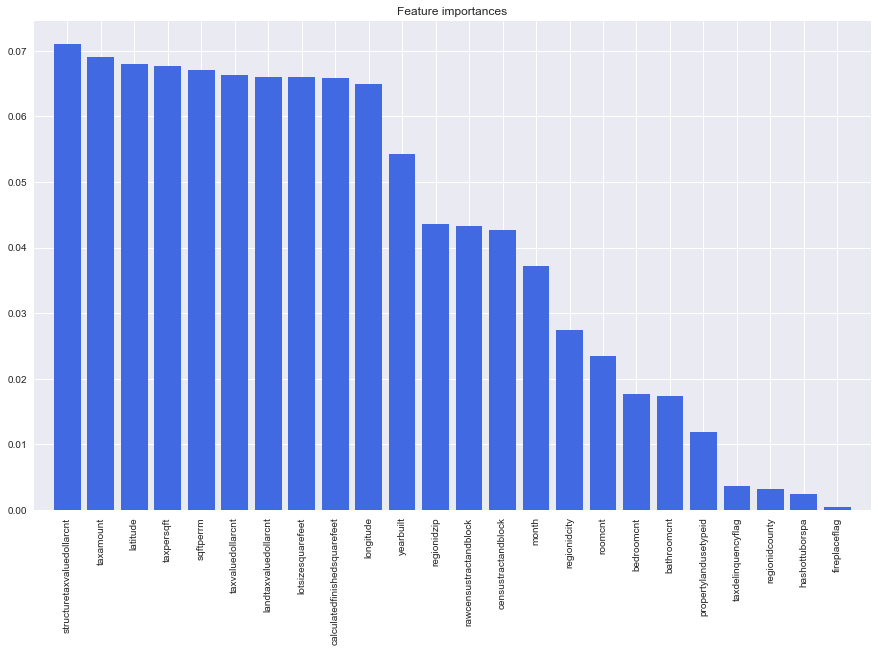

In [235]:
plt.figure(figsize=(15,9))
plt.title("Feature importances")
plt.bar(np.arange(len(featureImportance.feature)),featureImportance.importance,color="royalblue",align='center')
plt.xticks(np.arange(len(featureImportance.feature)), featureImportance.feature, rotation='vertical')
plt.xlim([-1, len(featureImportance.feature)])



In [236]:
plt.show()

In [237]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,rf_cv.best_estimator_.predict(X_test))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:   19.0s finished


0.070524644198187561

### Clustering

In [201]:
region = pd.read_csv('region.csv')

In [200]:
KMeans?

In [203]:
region.head(5)

,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,taxamount,propperzip
0,37688,3101,96337,0,0.0,9.0,0.00,8496
1,37688,3101,96337,0,0.0,27516.0,0.00,8496
2,51617,3101,96095,0,650756.0,1413387.0,20800.37,9437
3,12447,3101,96424,1948,571346.0,1156834.0,14557.57,7916
4,12447,3101,96450,1947,193796.0,433491.0,5725.17,7725


In [208]:
type(region)

pandas.core.frame.DataFrame